In [17]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

plt.style.use("default")
sns.set_theme(style="whitegrid")


In [18]:
tickers = {
    "TSLA": "Tesla",
    "BND": "Vanguard Total Bond Market ETF",
    "SPY": "S&P 500 ETF"
}

start_date = "2015-01-01"
end_date = "2026-01-15"


In [19]:
data = {}

for ticker in tickers.keys():
    df = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False
    )
    df["Asset"] = ticker
    data[ticker] = df


In [20]:
combined_df = pd.concat(data.values())
combined_df.reset_index(inplace=True)
combined_df.head()

Price,Date,Close,High,Low,Open,Volume,Asset,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8325 entries, 0 to 8324
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        8325 non-null   datetime64[ns]
 1   (Close, TSLA)   2775 non-null   float64       
 2   (High, TSLA)    2775 non-null   float64       
 3   (Low, TSLA)     2775 non-null   float64       
 4   (Open, TSLA)    2775 non-null   float64       
 5   (Volume, TSLA)  2775 non-null   float64       
 6   (Asset, )       8325 non-null   object        
 7   (Close, BND)    2775 non-null   float64       
 8   (High, BND)     2775 non-null   float64       
 9   (Low, BND)      2775 non-null   float64       
 10  (Open, BND)     2775 non-null   float64       
 11  (Volume, BND)   2775 non-null   float64       
 12  (Close, SPY)    2775 non-null   float64       
 13  (High, SPY)     2775 non-null   float64       
 14  (Low, SPY)      2775 non-null   float64       
 15  (Ope

In [22]:
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

In [23]:
combined_df.describe()

Price,Date,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY
count,8325,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,2020-07-07 01:53:38.594594304,138.472937,141.534064,135.271181,138.505925,1.108480e+08,67.325728,67.424458,67.224864,67.328205,4.485148e+06,339.074723,340.845874,337.015719,339.015875,8.604954e+07
min,2015-01-02 00:00:00,9.578000,10.331333,9.403333,9.488000,1.062000e+07,59.698658,59.772443,59.661756,59.728183,0.000000e+00,154.980881,156.031833,152.881622,154.540157,2.027000e+07
25%,2017-10-03 00:00:00,17.851666,18.087000,17.588000,17.836666,6.758150e+07,63.436424,63.504390,63.370284,63.438522,2.172700e+06,219.599655,221.038695,218.370019,219.349104,5.881420e+07
50%,2020-07-08 00:00:00,91.625999,94.484001,89.113998,93.066666,9.264600e+07,66.492088,66.634803,66.376248,66.478945,4.175700e+06,301.538452,303.765169,299.861272,302.125017,7.570750e+07
75%,2023-04-11 00:00:00,242.028336,247.846664,236.978333,242.901665,1.282366e+08,71.237347,71.377866,71.094416,71.256967,6.043050e+06,423.938507,425.886027,421.455185,423.759651,9.923995e+07
max,2026-01-14 00:00:00,489.880005,498.829987,485.329987,489.880005,9.140820e+08,76.068130,76.161609,76.034125,76.127610,3.396300e+07,695.159973,696.090027,691.349976,695.489990,5.072443e+08
std,NaN,131.682073,134.616345,128.668762,131.791350,7.145365e+07,4.685294,4.692171,4.676260,4.685213,2.918896e+06,141.925745,142.569517,141.139477,141.905190,4.386106e+07


In [24]:
combined_df.isna().sum()

Price   Ticker
Date                 0
Close   TSLA      5550
High    TSLA      5550
Low     TSLA      5550
Open    TSLA      5550
Volume  TSLA      5550
Asset                0
Close   BND       5550
High    BND       5550
Low     BND       5550
Open    BND       5550
Volume  BND       5550
Close   SPY       5550
High    SPY       5550
Low     SPY       5550
Open    SPY       5550
Volume  SPY       5550
dtype: int64

In [25]:
combined_df = combined_df.dropna()

In [26]:
combined_df = combined_df.sort_values(by=["Asset", "Date"])

In [28]:
combined_df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            ( 'Asset',     ''),
            ( 'Close',  'BND'),
            (  'High',  'BND'),
            (   'Low',  'BND'),
            (  'Open',  'BND'),
            ('Volume',  'BND'),
            ( 'Close',  'SPY'),
            (  'High',  'SPY'),
            (   'Low',  'SPY'),
            (  'Open',  'SPY'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [30]:
type(combined_df["Close"])

pandas.core.frame.DataFrame

In [34]:
combined_df.columns = [
    col[0] if isinstance(col, tuple) else col
    for col in combined_df.columns
]

In [36]:
for ticker, df in data.items():
    df = df.sort_index()
    df["Daily_Return"] = df["Close"].pct_change()
    df["Rolling_Volatility_30"] = df["Daily_Return"].rolling(30).std()
    data[ticker] = df

In [37]:
combined_df = pd.concat(data.values())
combined_df.reset_index(inplace=True)
combined_df.rename(columns={"index": "Date"}, inplace=True)

In [38]:
combined_df[["Date", "Asset", "Close", "Daily_Return", "Rolling_Volatility_30"]].head(10)

Price        Date Asset      Close         Daily_Return Rolling_Volatility_30
Ticker                        TSLA BND SPY                                   
0      2015-01-02  TSLA  14.620667 NaN NaN          NaN                   NaN
1      2015-01-05  TSLA  14.006000 NaN NaN    -0.042041                   NaN
2      2015-01-06  TSLA  14.085333 NaN NaN     0.005664                   NaN
3      2015-01-07  TSLA  14.063333 NaN NaN    -0.001562                   NaN
4      2015-01-08  TSLA  14.041333 NaN NaN    -0.001564                   NaN
5      2015-01-09  TSLA  13.777333 NaN NaN    -0.018802                   NaN
6      2015-01-12  TSLA  13.480667 NaN NaN    -0.021533                   NaN
7      2015-01-13  TSLA  13.616667 NaN NaN     0.010088                   NaN
8      2015-01-14  TSLA  12.846000 NaN NaN    -0.056597                   NaN
9      2015-01-15  TSLA  12.791333 NaN NaN    -0.004256                   NaN

In [40]:
plot_df = combined_df[["Date", "Asset", "Close", "Daily_Return", "Rolling_Volatility_30"]].copy()

plot_df["Date"] = pd.to_datetime(plot_df["Date"])

In [41]:
for ticker, df in data.items():
    df = df.sort_index()
    df["Daily_Return"] = df["Close"].pct_change()
    df["Rolling_Volatility_30"] = df["Daily_Return"].rolling(30).std()
    df["Asset"] = ticker  # add asset column
    data[ticker] = df

# Re-concatenate
combined_df = pd.concat(data.values())
combined_df.reset_index(inplace=True)
combined_df.rename(columns={"index": "Date"}, inplace=True)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Closing Prices
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x="Date", y="Close", hue="Asset")
plt.title("Closing Prices of TSLA, BND, SPY (2015-2026)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend(title="Asset")
plt.show()

# 2️⃣ Daily Returns
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x="Date", y="Daily_Return", hue="Asset")
plt.title("Daily Returns of TSLA, BND, SPY")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.legend(title="Asset")
plt.show()

# 3️⃣ Rolling Volatility
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x="Date", y="Rolling_Volatility_30", hue="Asset")
plt.title("30-Day Rolling Volatility of TSLA, BND, SPY")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend(title="Asset")
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (8325, 3) instead

<Figure size 1400x600 with 0 Axes>

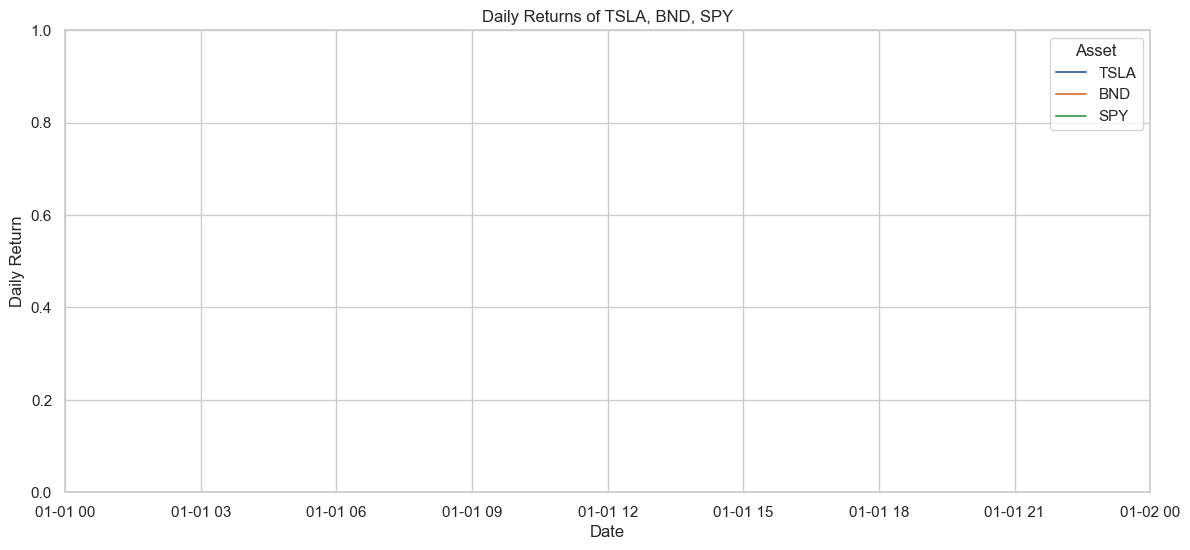

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x="Date", y="Daily_Return", hue="Asset")
plt.title("Daily Returns of TSLA, BND, SPY")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.show()

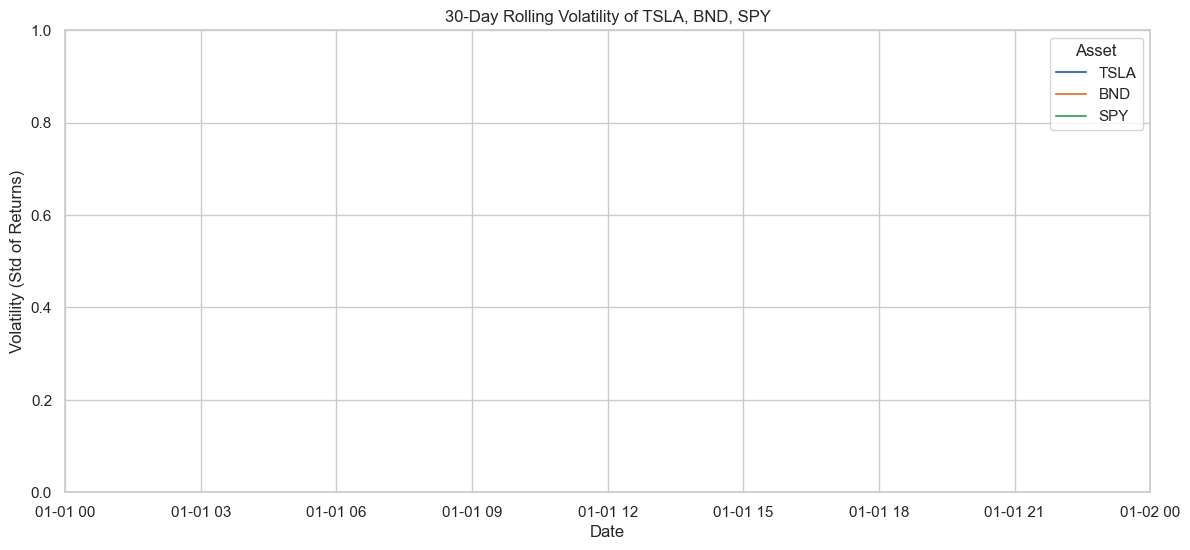

In [44]:
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x="Date", y="Rolling_Volatility_30", hue="Asset")
plt.title("30-Day Rolling Volatility of TSLA, BND, SPY")
plt.ylabel("Volatility (Std of Returns)")
plt.xlabel("Date")
plt.show()

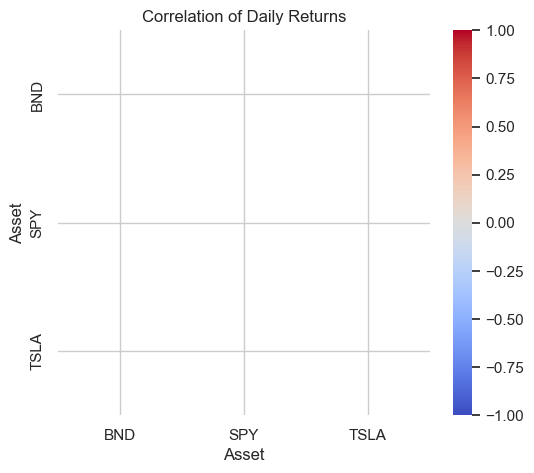

In [47]:
returns_df = combined_df.pivot(index="Date", columns="Asset", values="Daily_Return")
corr_matrix = returns_df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Daily Returns")
plt.show()

In [48]:
combined_df = combined_df.sort_values(by=["Asset", "Date"])

In [49]:
tsla_df = combined_df[combined_df["Asset"] == "TSLA"].copy()
tsla_df = tsla_df.set_index("Date")
tsla_df = tsla_df.asfreq("B") 
tsla_df = tsla_df.fillna(method="ffill")  

C:\Users\hp\AppData\Local\Temp\ipykernel_14500\2639748822.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_df = tsla_df.fillna(method="ffill")


In [51]:
combined_df.to_csv("../data/processed/combined_data.csv", index=False)
